# Discriminant functions in 2D

## Author: Dr Franck P. Vidal, Bangor University

For this Notebook, we will consider pairs of features (*n*) to generate a discriminant function in two dimensions. It is related to Lectre 4 on *Classification regions and discriminant functions*. Before you carry on, make sure you read and understand the slides (I don't know why I say that, of course you did it for Notebook 3 :-D).

In [1]:
import math
import random
import numpy as np
import pandas as pd

from scipy.stats import kurtosis
from scipy.stats import skew

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

font = {'family' : 'serif',
        #'weight' : 'bold',
         'size'   : 7.5
       }
matplotlib.rc('font', **font)

from utils import *

# Load the dataset using Pandas

In [2]:
raw_df = pd.read_csv("dataset.csv")

In [3]:
df = raw_df.drop(labels=["x", "y", "length of tile size [in px]"], axis=1)

In [4]:
display(df)

,avg,median,stddev,kurtosis,skewness,c
0,0.351310,0.350828,0.018950,-0.477596,0.016406,2
1,0.315120,0.315080,0.018807,-0.572361,0.091526,2
2,1.460836,1.439744,0.189482,-1.206975,0.213772,2
3,0.411507,0.412270,0.018335,-0.520053,-0.037214,2
4,0.692839,2.289596,3.404967,-1.546484,-0.546712,1
5,-0.424341,-0.474168,0.489323,-1.062667,0.306800,1
6,-0.627581,-1.024072,0.611619,-0.554643,0.948299,2
7,0.503006,0.502757,0.017954,-0.528245,0.153976,2
8,1.432037,1.423266,0.183619,-1.249475,0.096541,2
9,0.355340,0.355296,0.018045,-0.404906,0.039975,1


# Extract the number of features

In [5]:
n = getn(df)
print("Number of features:", n)

Number of features: 5


# Extract the number of objects

In [6]:
N = getN(df)
print("Number of features:", N)

Number of features: 22


# Extract the labels

In [7]:
y = df["c"]

# Extract the feature names

In [8]:
# Get the label of all the columns, and remove the last one
dimensions=np.array(df.columns)[:-1]
print(dimensions)

['avg' 'median' 'stddev' 'kurtosis' 'skewness']


# Display the scatterplot matrix of features

## Using Matplotlib

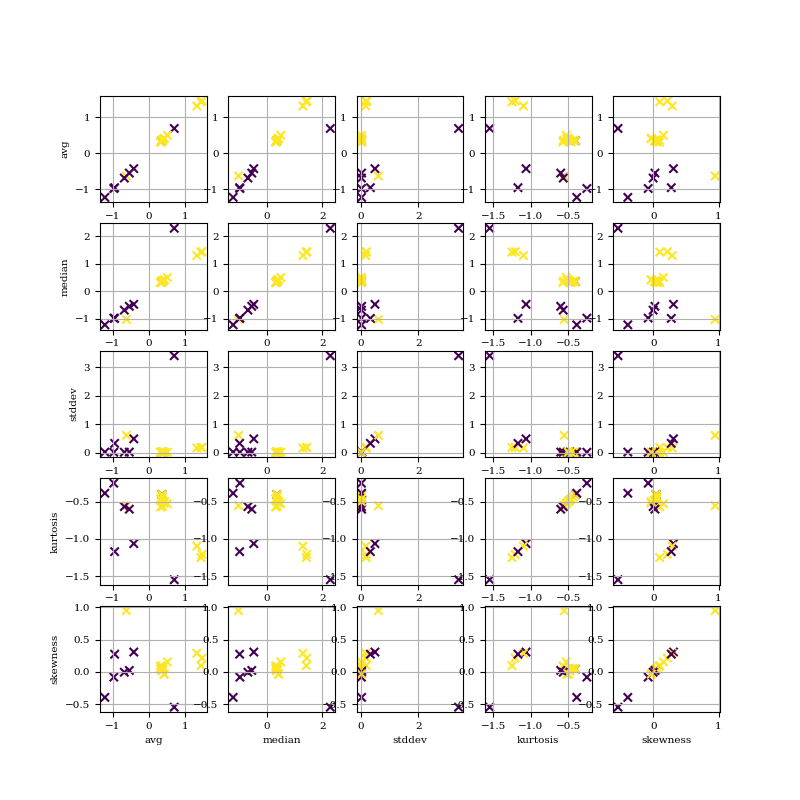

In [9]:
%matplotlib widget

plt.figure(figsize=(8, 8))

for j in range(n):
    for i in range(n):
        plot_index = j * n + i + 1
        plt.subplot(n, n, plot_index)
        plt.scatter(df[dimensions[i]], df[dimensions[j]], marker="x", c=y)
        
        if j == n - 1:
            plt.xlabel(dimensions[i])
            
        if i == 0:
            plt.ylabel(dimensions[j])
            
        plt.grid()

# In 2D

Select which features to consider, e.g. $x_4$ (kurtosis) and $x_1$ (average). 
We must choose the ones that separate the two classes.

1. Find the line that separate the two classes,
2. find two points on the line:
    - (-1.5, 1.25)
    - (-0.4, -0.23)
3. Write the line equation:
    
    $$y = a \times x + b$$
    
    Find a, the slope of the line:
    
    $$
    a = \frac{\text{change in y}}{\text{change in x}} \\
    a = \frac{-0.23 - 1.25}{-0.4 - -1.5} \\
    a = \frac{-1.48}{1.1} \\
    $$
    
    Pick one of the two points and replace, $x$, $y$ and $a$ with their corresponding values:
    
    $$
    1.25 = \frac{-1.48}{1.1} \times (-1.5) + b\\
    1.25 = \frac{1.48}{1.1} \times 1.5 + b \\
    1.25 = \frac{1.48 \times 1.5}{1.1}  + b \\
    1.25 = \frac{2.22}{1.1}  + b \\
    $$
    
    Find $b$:
    
    $$
    1.25 = \frac{2.22}{1.1} + b \\
    b = 1.25 - \frac{2.22}{1.1} \\
    b = \frac{1.25 \times 1.1}{1.1} - \frac{2.22}{1.1} \\
    b = \frac{1.375}{1.1} - \frac{2.22}{1.1} \\
    b = \frac{1.375 - 2.22}{1.1} \\
    b = -\frac{0.845}{1.1}
    $$
    
    Here is our line equation:
    
    $$
    y = -\frac{1.48}{1.1} x - \frac{0.845}{1.1}\\
    $$
    
    Let double check that it works for our two points:

The two points

In [10]:
P1 = [-1.5, 1.25]
P2 = [-0.4, -0.23]

print("P1", P1)
print("P2", P2)

P1 [-1.5, 1.25]
P2 [-0.4, -0.23]


The slope of the line

In [11]:
a = (P2[1] - P1[1]) / (P2[0] - P1[0])

print(a)

-1.3454545454545452


b

In [12]:
b = P1[1] - a * P1[0]
print(b)

-0.7681818181818176


In [13]:
print("P1:", P1[0], a * P1[0] + b)
print("P2:", P2[0], a * P2[0] + b)

P1: -1.5 1.25
P2: -0.4 -0.22999999999999954


The line equation works well.
Let's rewrite in in the form $k_1 x + k_2 y + k_3 = 0$

$$
y = a x + b\\
y = -\frac{1.48}{1.1} x - \frac{0.845}{1.1}\\
1.1 \times y = 1.1 a x + 1.1 b\\
-1.1 a x + 1.1 y - 1.1 b = 0\\
$$

Let double check that it works for our two points:


In [14]:
print(-a * 1.1 * P1[0] + 1.1 * P1[1] - b * 1.1)
print(-a * 1.1 * P2[0] + 1.1 * P2[1] - b * 1.1)

-3.3306690738754696e-16
-5.551115123125783e-16


The line equation works well. Write the discriminant function, e.g. 

$$
g(\mathbf{x}) = -1.1 a x_1 + 1.1 x_2 - 1.1 b\\
g(\mathbf{x}) = \frac{1.628}{1.1} \times x_1 + 1.1 \times x_2 + \frac{0.9285}{1.1}\\
$$

Then 

If the sign of $g(x)$ is negative, then the object is of a given class, else of the other class.

In [15]:
def g2(k1, k2, k3, x1, x2):
    # Discriminant function
    g = k1 * x1 + k2 * x2 + k3
    # g = 1.628 / 1.1 * x1 + 1.1 * x2 + 0.9285 / 1.1
    
    # Get the sign
    p = np.sign(g).astype(np.int8)
    
    # Replace -1 with 0
    p[p==-1] = 0
    
    # 0 is for the background (1), 1 is for the foregroung (2)
    p += 1
    
    # Return the prediction
    return p 

In [16]:
x1 = df["kurtosis"]
x2 = df["avg"]

for c, prediction in zip(y, g2(-a * 1.1, 1.1, -b * 1.1, x1, x2)):
    print(c, prediction)

2 2
2 2
2 2
2 2
1 1
1 1
2 1
2 2
2 2
1 2
2 2
1 1
2 2
2 2
2 2
2 2
1 1
1 1
2 2
1 1
1 1
2 2


# Test our classifiers

## Load the image

In [17]:
np_image, bias, gain, vmin, vmax = loadImage()

# Extract random pixel positions

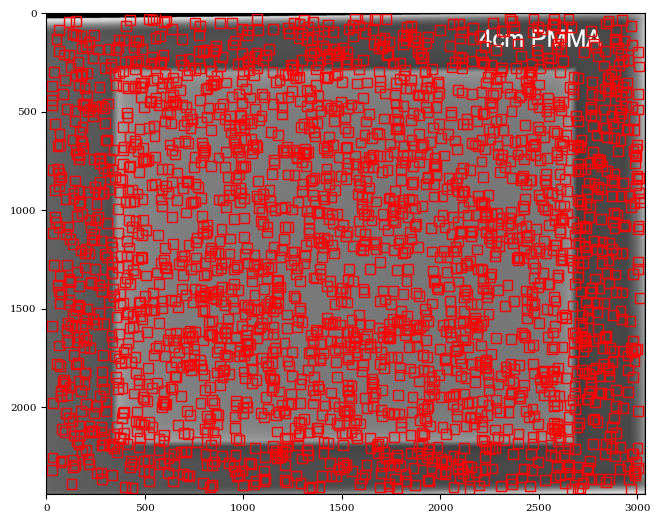

In [18]:
%matplotlib inline
tile_lenght = int(raw_df["length of tile size [in px]"].median())

plt.figure(figsize=(17,10))
ax = plt.subplot(1, 2, 1)
plt.imshow(np_image, cmap="gray", vmin=vmin, vmax=vmax)

pos_x = []
pos_y = []

for i in range(2500):
    
    pos_x.append(random.randint(0, np_image.shape[1] - 1 - tile_lenght))
    pos_y.append(random.randint(0, np_image.shape[0] - 1 - tile_lenght))

    rect = patches.Rectangle((pos_x[-1], pos_y[-1]), 
                         tile_lenght, tile_lenght, 
                         linewidth=1, edgecolor='r', facecolor='none');
    ax.add_patch(rect)


# Extract the corresponding features

In [19]:
def getRecord(x, y, image, tile_lenght):
    
    tile = image[y:y+tile_lenght, x:x+tile_lenght];

    row = []
    
    row.append(np.mean(tile))
    row.append(np.median(tile))
    row.append(np.std(tile))
    row.append(kurtosis(tile, axis=None))
    row.append(skew(tile, axis=None))
    
    return row

In [20]:
rows = []
for i, j in zip(pos_x, pos_y):
    rows.append(getRecord(i,j,np_image,tile_lenght))

In [21]:
test_df = pd.DataFrame(columns=dimensions, data=rows)

In [22]:
display(test_df)

,avg,median,stddev,kurtosis,skewness
0,-1.293644,-1.288830,0.058401,-1.051045,-0.213986
1,0.633975,0.634577,0.022805,-0.342320,-0.074969
2,-1.360795,-1.357254,0.025748,-0.421684,-0.498821
3,1.049534,1.035625,0.085317,-0.821718,0.393426
4,-0.530178,-0.530583,0.020857,-0.448749,0.096697
...,...,...,...,...,...
2495,1.031809,1.018588,0.094181,-0.938549,0.364557
2496,0.473519,0.473153,0.018798,-0.360060,0.152926
2497,-0.796158,-1.037757,0.647449,-0.203037,0.973125
2498,0.373317,0.373729,0.018918,-0.228199,-0.079739


# Prediction using the discriminant function on $x_4$ and $x_1$

In [23]:
prediction = g2(-a * 1.1, 1.1, -b * 1.1, test_df["kurtosis"], test_df["avg"])

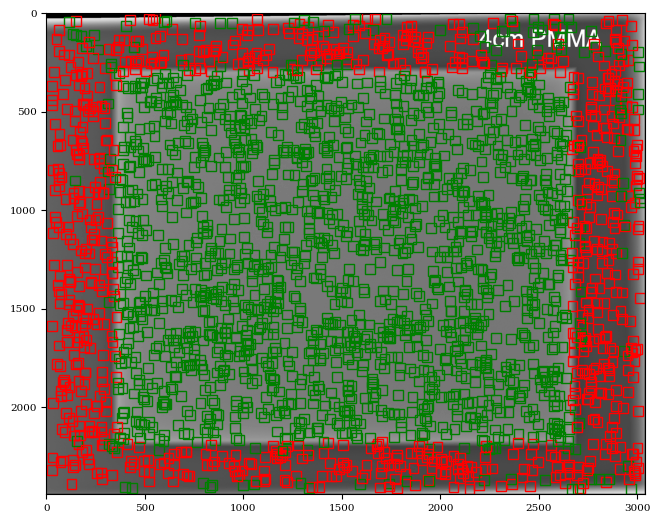

In [24]:
plt.figure(figsize=(17,10))
ax = plt.subplot(1, 2, 1)
plt.imshow(np_image, cmap="gray", vmin=vmin, vmax=vmax)

for i,j,c in zip(pos_x, pos_y, prediction):
    
    pos_x.append(random.randint(0, np_image.shape[1] - 1 - tile_lenght))
    pos_y.append(random.randint(0, np_image.shape[0] - 1 - tile_lenght))

    if c == 1:
        rect = patches.Rectangle((i, j), 
                             tile_lenght, tile_lenght, 
                             linewidth=1, edgecolor='r', facecolor='none');
    else:
        rect = patches.Rectangle((i, j), 
                             tile_lenght, tile_lenght, 
                             linewidth=1, edgecolor='g', facecolor='none');
    ax.add_patch(rect)

    